In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.concat([pd.read_csv('International students Time management data.csv'), pd.read_csv('Sheet2.csv')], axis=1)

In [3]:
df.head()

Number    Age Gender Nationality Program                          Course  \
0       1  31-35      M       Korea      PM  Social Sciences and Humanities   
1       2  26-30      M       China      PM         Science and engineering   
2       3  26-30      M       Kenya      PM                        Business   
3       4  21-25      M     Vietnam      PM               Law/Legal studies   
4       5  21-25      M       China      PM                        Business   

   English Academic Attendance             6  ...            15            16  \
0  60%~70%      NaN         S0      Disagree  ...       Neither      Disagree   
1  60%~70%  50%~59%         S3  Strong Agree  ...         Agree       Neither   
2  60%~70%      NaN         S0      Disagree  ...  Strong Agree  Strong Agree   
3  60%~70%  60%~70%         S0      Disagree  ...       Neither      Disagree   
4  60%~70%  50%~59%         S1       Neither  ...      Disagree       Neither   

         17 Order                                          Questions  \
0     Agree   NaN                                                NaN   
1  Disagree   6.0  You often feel that your life is aimless, with...   
2  Disagree   7.0  You never have trouble organizing the things y...   
3     Agree   8.0  Once you've started an activity, you persist a...   
4     Agree   9.0  Sometimes you feel that the things you have to...   

  Option & scores Unnamed: 3                 Unnamed: 4 Unnamed: 5  \
0    Strong agree      Agree  Neither Agree or Disagree   Disagree   
1               1          2                          3          4   
2               5          4                          3          2   
3               5          4                          3          2   
4               1          2                          3          4   

        Unnamed: 6  
0  Strong disagree  
1                5  
2                1  
3                1  
4                5  

[5 rows x 28 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 28 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Number           125 non-null    int64  
 1   Age              125 non-null    object 
 2   Gender           125 non-null    object 
 3   Nationality      125 non-null    object 
 4   Program          125 non-null    object 
 5   Course           125 non-null    object 
 6   English          119 non-null    object 
 7   Academic         103 non-null    object 
 8   Attendance       119 non-null    object 
 9   6                123 non-null    object 
 10  7                125 non-null    object 
 11  8                121 non-null    object 
 12  9                118 non-null    object 
 13  10               124 non-null    object 
 14  11               123 non-null    object 
 15  12               122 non-null    object 
 16  13               125 non-null    object 
 17  14              

In [5]:
df.describe()

Number      Order
count  125.000000  12.000000
mean    63.000000  11.500000
std     36.228442   3.605551
min      1.000000   6.000000
25%     32.000000   8.750000
50%     63.000000  11.500000
75%     94.000000  14.250000
max    125.000000  17.000000

In [6]:
df.isnull().sum()

Number               0
Age                  0
Gender               0
Nationality          0
Program              0
Course               0
English              6
Academic            22
Attendance           6
6                    2
7                    0
8                    4
9                    7
10                   1
11                   2
12                   3
13                   0
14                   1
15                   0
16                   2
17                   1
Order              113
Questions          113
Option & scores    112
Unnamed: 3         112
Unnamed: 4         112
Unnamed: 5         112
Unnamed: 6         112
dtype: int64

In [7]:
df.fillna(df.median(numeric_only=True), inplace=True)

In [8]:
num_cols = df.select_dtypes(include=np.number).columns

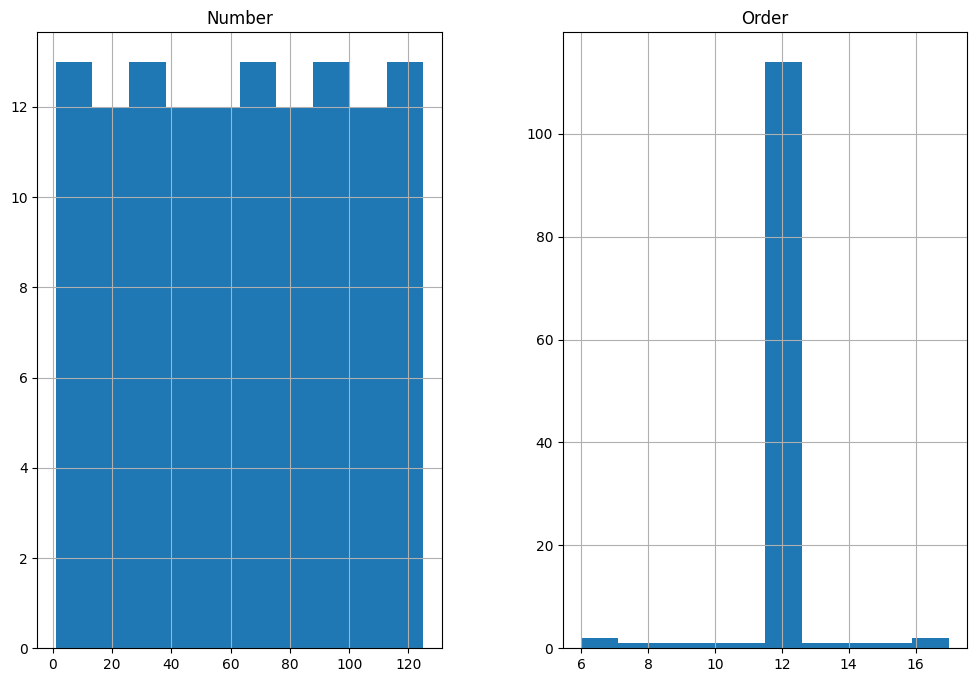

In [9]:
df[num_cols].hist(figsize=(12,8)); plt.show()

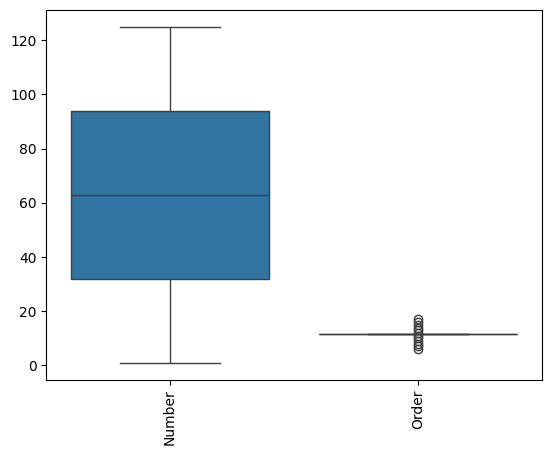

In [10]:
sns.boxplot(data=df[num_cols]); plt.xticks(rotation=90); plt.show()

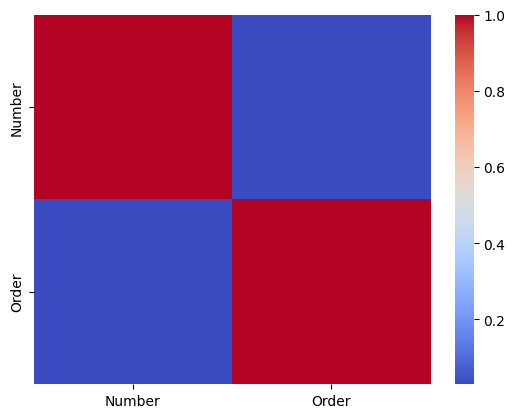

In [11]:
sns.heatmap(df[num_cols].corr(), cmap='coolwarm'); plt.show()

In [12]:
X = df.select_dtypes(include=np.number).iloc[:,:-1]
y = df.select_dtypes(include=np.number).iloc[:,-1]

In [13]:
from sklearn.model_selection import train_test_split

ModuleNotFoundError: No module named 'sklearn'

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

NameError: name 'train_test_split' is not defined

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression(); lr.fit(X_train,y_train)

In [ ]:
pred = lr.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [ ]:
mean_squared_error(y_test,pred), mean_absolute_error(y_test,pred), r2_score(y_test,pred)

In [ ]:
df['Class']=(y>y.median()).astype(int)